In [1353]:
import pandas as pd
df_2018 = pd.read_csv("./data/2018DATA_7장노년_KEY작업.csv")
df_2019 = pd.read_csv("./data/2019DATA_7장노년_KEY작업.csv")
df_2020 = pd.read_excel("./data/2020DATA_7고령층.xlsx")

### 데이터 결합

In [1354]:
# 2018년 열 전처리
columns =list(df_2018.columns[49:59]) +list(df_2018.columns[99:116]) +list(df_2018.columns[124:132]) +list(df_2018.columns[153:184])
df_2018.drop(columns, axis = 1, inplace =True)
columns = ['문2) (보기 카드 제시) 다음 제시한 기기별로 귀댁에서 귀하가 이용할 수 있는 기기의 보유여부를 응답해주세요 1) 휴대폰(모두 응답)_보유여부','문16) (인터넷 이용자(문7의 ①응답자) 대상) 귀하께서는 디지털기기(PC 또는 스마트폰 등)를 이용하다 잘 모르거나 문제가 생기면 어떻게 도움을 받는지요? 해당되는 것을 모두 골라주세요.7','[일반/장노년]장애구분 (등록장애인 기준) -급']
df_2018.drop(columns, axis =1 , inplace=True)
df_2018.shape


(2303, 164)

In [1355]:
# 2019년 열 전처리
no_2019 = "Q23,Q23A01,Q23A02,Q23A03,Q23A04,Q23A05,Q23A06,Q23A07,Q23A08,Q23A09,Q23A10,Q23BA1,Q23BA2,Q23BA3,Q23BA4,Q23BA5,Q23BA6,Q23BA7,Q23BB1,Q23BB2,Q23BB3,Q23BB4,Q23BB5,Q23BB6,Q23BB7,Q23BC1,Q23BC2,Q23BC3,Q23BC4,Q23BC5,Q23BC6,Q23BC7,Q24AA1,Q24AA2,Q24AA3,Q24AA4,Q24AB1,Q24AB2,Q24AB3,Q24AB4,Q24AC1,Q24AC2,Q24AC3,Q24AC4,Q24B01,Q24B02,Q24B03,Q24B04,Q24B05,Q24B06,Q24B07,Q24B08,Q24B09,Q24B10,Q25AA1,Q25AA2,Q25AA3,Q25AA4,Q25AA5,Q25AB1,Q25AB2,Q25AB3,Q25AB4,Q25AB5,Q25AC1,Q25AC2,Q25AC3,Q25AC4,Q25AC5,Q26,Q27,Q28A1,Q28A2,Q28A3,Q28A4,Q29A1,Q29A2,Q29A3,Q29A4,Q30A1,Q30A2,Q30A3,Q30A4,Q30A5,Q30A6,Q30A7,Q30A8"
no_2019 = no_2019.split(",")
df_2019.drop(no_2019,axis=1,inplace=True)
df_2019.shape

(2300, 183)

In [1356]:
# 2020년 열 전처리
no_2020 = "Q23A,Q23B,Q23A1,Q23A2,Q23A3,Q23A4,Q23A5,Q23A6,Q23A7,Q23BA1,Q23BA2,Q23BA3,Q23BA41,Q23BA42,Q23BB1,Q23BB2,Q23BB3,Q23BB41,Q23BB42,Q23BC1,Q23BC2,Q23BC3,Q23BC41,Q23BC42,Q23BD1,Q23BC2,Q23BC3,Q23BC41,Q23BC42,Q23C1,Q23C2,Q23C3,Q23BC2.1,Q23BC3.1,Q23BC41.1,Q23BC42.1"
no_2020 = no_2020.split(",")
df_2020.drop(no_2020,axis=1,inplace=True)
df_2020.shape

(2300, 183)

In [1357]:
# 2020년 2019 년 데이터 결합
df_2020.columns = df_2019.columns

In [1358]:
#년도 삽입
df_2020['년도'] = [2020] * len(df_2020)
df_2019['년도'] = [2019] * len(df_2019)
df_2018['년도'] = [2018] * len(df_2018)

In [1359]:
#2019 + 2020 결합
df = df_2019.append(df_2020, ignore_index =True)

In [1360]:
#필요 없는 열제거 
columns = '''
TYP
Q10A1
Q10A2
Q10A3
Q10A4
Q10B1
Q10B2
Q10B3
Q10B4
Q17A04
Q17A05
Q17A06
Q17A07
Q17A08
Q17A09
Q17A10
Q19A4
Q19A5
Q19A6
'''.split()
df.drop(columns, axis = 1, inplace=True)
df.shape


(4600, 165)

In [1361]:
df_2018.columns = df.columns

In [1362]:
# 2018 + 2019 + 2020 데이터 결합
df = df.append(df_2018, ignore_index = True)

In [1363]:
df.shape

(6903, 165)

In [1364]:
df.to_csv('./data/데이터결합.csv')

### 데이터 전처리

In [1365]:
import pandas as pd
df = pd.read_csv('./data/데이터결합.csv')

#노인 실태조사 설문지와 겹치는 데이터 추출
df = df.loc[:,['ADQ1','ADQ101','ADQ102','ADQ103','ADQ2','ADQ3','ADQ4','ADQ5','ADQ7','ADQ8A1','ADQ8A2','ADQ8A3','ADQ8A4','ADQ8A5','ADQ8A6','ADQ8A7','ADQ8A8','ADQ9','Q1A1','Q1A2','Q21A1','Q21A2','Q21A7','Q22A3','Q2A11','Q2A12','Q2A2','Q5A5','Q8A1','Q8A3','Q8A4','Q8B1','Q8B3','Q8B4','Q9A1','Q9B1',
              'Q32A01','Q32A02','Q32A03','Q32A04','Q32A05','Q32A06','Q32A07','Q32A08','Q32A09','Q32A10','Q32A11','Q32A12','Q32A13','Q32A14','Q32A15','Q32A16','Q32A17','Q32A18','Q32A19','Q32A20','Q32A21','Q32A22','년도']]

In [1366]:
#별이 남아 있는거 저장
df.to_csv('./data/remain_star.csv')

In [1367]:
# * 제거 
lst = []

for j in range(0,df.shape[1]):
    for i in range(0,df.shape[0]):
        if df.iloc[i,j] == "*":
            if i not in lst: # 중복값 제거
                lst.append(i) 
df.drop(index = lst, inplace = True)
df.reset_index(drop=True,inplace=True)

In [1368]:
# 이름 바꾸기 
df.rename( columns = {'Q21A7':'건강상태', 'ADQ5':'장애판정', 'ADQ3':'직업', 'ADQ101':'광역시도','ADQ1':'연령','ADQ102':'시_1_군_0','ADQ103': '동_1_읍면_0','Q21A2':'경제적_만족도','Q21A7': '건강상태_만족도', 'Q21A1' : '여가문화생활_만족도', 'Q22A3' : '전반적인삶_만족도', 'ADQ9' : '가구월평균소득', 'ADQ7' : '가구거주형태', 'ADQ2' : '성별', 'ADQ4' : '최종학력'},inplace=True)

In [1369]:
# 원핫 인코딩
onehot_columns = ["직업", "광역시도", "가구거주형태", "최종학력"]
df = pd.get_dummies(df, columns = onehot_columns, dtype = int)
df.head()

,연령,시_1_군_0,동_1_읍면_0,성별,장애판정,ADQ8A1,ADQ8A2,ADQ8A3,ADQ8A4,ADQ8A5,...,광역시도_8,광역시도_9,가구거주형태_1,가구거주형태_2,가구거주형태_3,가구거주형태_4,최종학력_1,최종학력_2,최종학력_3,최종학력_4
0,55,1,1,2,1,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,1,0
1,55,2,2,2,1,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,1,0,0
2,55,2,2,1,1,1.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
3,55,2,2,2,1,1.0,3.0,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,1,0
4,55,1,2,1,1,1.0,3.0,NaN,NaN,NaN,...,0,1,0,1,0,0,0,0,1,0


In [1370]:
# 0 없다 1 있다로 변경
df["장애판정"] = df["장애판정"].apply(lambda x: 0 if x==1 else 1)
df["시_1_군_0"] = df["시_1_군_0"].apply(lambda x: 1 if x==1 else 0)
df['동_1_읍면_0'] = df['동_1_읍면_0'].apply(lambda x: 1 if x==1 else 0)
df['성별'] = df['성별'].apply(lambda x: 1 if x== '1' else 0)


In [1371]:
# 1,2 ==> 0 없다 3,4 ==> 1 있다로 변경

# 온라인_교육_여부
teaching_list = []
for i in range(len(df)):
    if df['Q8A4'][i] in [3,4] or df['Q8B4'][i] in [3,4]:
        teaching_list.append(1) #있다
    else:
        teaching_list.append(0)

df = df.drop(columns = ['Q8A4','Q8B4'])
df['온라인_교육_여부'] = teaching_list

#pc,노트북
pc = []
for i in range(len(df)):
    if df['Q1A1'][i] == 1 or df['Q1A2'][i] == 1:
        pc.append(1) #있다
    else:
        pc.append(0)

df = df.drop(columns = ['Q1A1','Q1A2'])
df['pc_노트북_보유'] = pc

# 피처폰_보유
phone = []
for i in range(len(df)):
    if df['Q2A11'][i] == 2 or df['Q2A12'][i] == 2:
        phone.append(1) #있다
    else:
        phone.append(0)

# df = df.drop(columns = ['Q2A11','Q2A12'])
df['피처폰_보유'] = phone

#스마트폰_보유
smart_phone = []
for i in range(len(df)):
    if df['Q2A11'][i] == 1 or df['Q2A12'][i] == 1 or df['Q2A2'][i] == 1:
        smart_phone.append(1) #있다
    else:
        smart_phone.append(0)

df= df.drop(columns = ['Q2A11','Q2A12', 'Q2A2'])
df['스마트폰_태블릿PC_보유'] = smart_phone

df['스마트폰_태블릿PC_보유'].unique(), df['스마트폰_태블릿PC_보유'].shape

#뉴스_날씨
news = []
for i in range(len(df)):
    if df['Q8A1'][i] in [3,4] or df['Q8B1'][i] in [3,4]:
        news.append(1) #있다
    else:
        news.append(0)

df = df.drop(columns = ['Q8A1','Q8B1'])
df['뉴스_날씨'] = news

df['뉴스_날씨'].unique(), df['뉴스_날씨'].shape

#미디어콘텐츠
lst = []
for i in range(len(df)):
    if df['Q8A3'][i] in [3,4] or df['Q8B3'][i] in [3,4]:
        lst.append(1) #있다
    else:
        lst.append(0)

df = df.drop(columns = ['Q8A3','Q8B3'])
df['미디어콘텐츠'] = lst

df['미디어콘텐츠'].unique(), df['미디어콘텐츠'].shape

#SNS
lst = []
for i in range(len(df)):
    if df['Q9A1'][i] in [3,4] or df['Q9B1'][i] in [3,4]:
        lst.append(1) #있다
    else:
        lst.append(0)

df = df.drop(columns = ['Q9A1','Q9B1'])
df['SNS'] = lst

df['SNS'].unique(), df['SNS'].shape


#앱 검색 및 설치
lst = []
for i in range(len(df)):
    if df['Q5A5'][i] in [3,4]:
        lst.append(1) #있다
    else:
        lst.append(0)

df = df.drop(columns = 'Q5A5')
df['앱 검색 및 설치'] = lst

df['앱 검색 및 설치'].unique(), df['앱 검색 및 설치'].shape

# 형제자매_존재
lst = []
for i in range(len(df)):
    if df['ADQ8A1'][i] in [2] or df['ADQ8A2'][i] in [2] or df['ADQ8A3'][i] in [2] or df['ADQ8A4'][i] in [2] or df['ADQ8A5'][i] in [2] or df['ADQ8A6'][i] in [2] or df['ADQ8A7'][i] in [2] or df['ADQ8A8'][i] in [2]:
        lst.append(1) #있다
    else:
        lst.append(0)

df['형제자매_존재'] = lst

# 부모_존재
lst = []
for i in range(len(df)):
    if df['ADQ8A1'][i] in [4] or df['ADQ8A2'][i] in [4] or df['ADQ8A3'][i] in [4] or df['ADQ8A4'][i] in [4] or df['ADQ8A5'][i] in [4] or df['ADQ8A6'][i] in [4] or df['ADQ8A7'][i] in [4] or df['ADQ8A8'][i] in [4]:
        lst.append(1) #있다
    else:
        lst.append(0)

df['부모_존재'] = lst

# 배우자_존재
lst = []
for i in range(len(df)):
    if df['ADQ8A1'][i] in [1] or df['ADQ8A2'][i] in [1] or df['ADQ8A3'][i] in [1] or df['ADQ8A4'][i] in [1] or df['ADQ8A5'][i] in [1] or df['ADQ8A6'][i] in [1] or df['ADQ8A7'][i] in [1] or df['ADQ8A8'][i] in [1]:
        lst.append(1) #있다
    else:
        lst.append(0)

df['배우자_존재'] = lst

# 동거자녀_존재
lst = []
for i in range(len(df)):
    if df['ADQ8A1'][i] in [3] or df['ADQ8A2'][i] in [3] or df['ADQ8A3'][i] in [3] or df['ADQ8A4'][i] in [3] or df['ADQ8A5'][i] in [3] or df['ADQ8A6'][i] in [3] or df['ADQ8A7'][i] in [3] or df['ADQ8A8'][i] in [3]:
        lst.append(1) #있다
    else:
        lst.append(0)

df['동거자녀_존재'] = lst
df = df.drop(columns = ['ADQ8A1','ADQ8A2','ADQ8A3','ADQ8A4', 'ADQ8A5', 'ADQ8A6', 'ADQ8A7', 'ADQ8A8'])

In [1372]:
#희망 프로그램 (중복값 펼치기)
# "y" 펼치기
df = df.fillna(0)
        
lst = []
    
for column in range(1,23): 
    for j in range(len(df.loc[:,"Q32A{:02d}".format(column)])):
        new_data = df.loc[j,:]
        if df.loc[j,"Q32A{:02d}".format(column)] != 0:
            new_data['y'] = df.loc[j,"Q32A{:02d}".format(column)]
            lst.append(new_data)
            
df_y = pd.DataFrame(lst)
df_y.reset_index(drop=True,inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)


In [1373]:
#y값 묶음
y_feature = {
    1: [1.,2.,3.,4.,5.],
    2:[6.,7.,8.,9.,10.],
    3:[11.,12.,13.],
    4:[14.,15.,16.,17.],
    5:[18.,19.,20.]
            }
def change_y(x):
    for key, value in y_feature.items():
        for title in value:
            if x == title:
                return key
    return 0

#21, 22, 99 삭제 이거 잘못됨
df_y['y'] = df_y['y'].apply(lambda x: change_y(x))
df_y = df_y[df_y['y'] != 0] 

In [1374]:
# 필요 없는 변수 제거
for column in range(1,23):  
    df_y = df_y.drop(["Q32A{:02d}".format(column)],axis=1)
    

In [1375]:
#가구 월평균소득 99 제거 
df_y = df_y[df_y['가구월평균소득'] != 99]
df_y['가구월평균소득'].unique()

array([ 4.,  8.,  7.,  5.,  6., 10.,  9., 11.,  2.,  3.,  1.])

In [1376]:
df_y.to_csv('./data/전처리완료.csv')


In [1377]:
df_y = pd.read_csv('./data/전처리완료.csv',index_col = 0)
df_y['전반적인삶_만족도'].unique()

array([2., 3., 4., 1., 7., 6., 5.])

In [1559]:
df_y['전반적인삶_만족도'].unique()

array([2, 3, 1, 4], dtype=int64)

## 모델

In [1648]:
df_y = pd.read_csv('./data/전처리완료.csv',index_col = 0)

def yes_no(x):
    if x in[2.,3.]:
        return 2
    elif x in [4.,5]:
        return 3
    elif x in [6.,7.]:
        return 4
    else:
        return 1
    
def sum_4_5(x):
    if x == 5:
        return 3
    elif x == 4:
        return 3
    else :
        return x
df_y['y'] = df_y['y'].apply(lambda x: sum_4_5(x))
df_y['전반적인삶_만족도'] = df_y['전반적인삶_만족도'].apply(lambda x: yes_no(x))
# df_y = df_y[ (df_y['년도']==2019) | (df_y['년도'] == 2020)]
# 65세이상 데이터
del df_y['년도']
df_65 = df_y[df_y['연령'] >= 65]
df_65.reset_index(drop = True, inplace = True)

#연령 범주화 하기
def old_range(x):
    if 65 <= x <75:
        return 5
    elif 75 <= x <85:
        return 4
    elif 85 <= x <95:
        return 3
    else:
        return 0

df_y_old_range = df_y.copy()
df_y_old_range['연령'] = df_y['연령'].apply(lambda x : old_range(x)).astype("float64")
df_65_old_range = df_65.copy()
df_65_old_range['연령'] = df_65['연령'].apply(lambda x : old_range(x)).astype("float64")

feature_columns = df_y.columns.difference(["y"]) # new_y를 제외한 모든 행



### 모델 먼저 돌려보기

In [1589]:
#모델 분리 df_y (연령 : 연속형, 55세 포함)
X = df_y[feature_columns]
y = df_y['y']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6508, 59) (1627, 59) (6508,) (1627,)


In [1590]:
#df_65 (연령 : 연속형, 65세 이상)
X = df_65[feature_columns]
y = df_65['y']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2161, 59) (541, 59) (2161,) (541,)


In [1591]:
#df_y_old_range (연령 : 범주, 55세 이상)
X = df_y_old_range[feature_columns]
y = df_y_old_range['y']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6508, 59) (1627, 59) (6508,) (1627,)


In [1592]:
#df_65_old_range (연령 : 범주, 65세 이상)
X = df_65_old_range[feature_columns]
y = df_65_old_range['y']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2161, 59) (541, 59) (2161,) (541,)


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

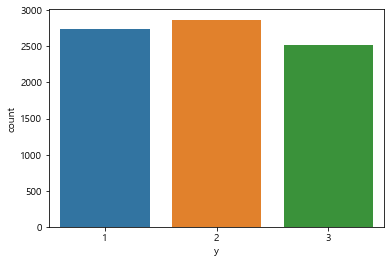

In [1658]:
import seaborn as sns
sns.countplot(df_y['y'])

## 로지스틱

In [1594]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print('accuracy:',accuracy_score(y_test,y_pred))

accuracy: 0.4288354898336414


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### KNN

In [1595]:
import numpy as np
from sklearn import neighbors,datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

clf = neighbors.KNeighborsClassifier(5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('accuracy:',accuracy_score(y_test,y_pred))

accuracy: 0.4121996303142329


## SVM

In [1596]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

#비선형 SVM 분류모델을 학습하고 평가
svm = SVC(kernel = 'rbf', C=1.0, random_state = 0, gamma = 0.1)
svm.fit(X_train, y_train)
y_pred_ksvc = svm.predict(X_test)
print('Accuracy %.2f' % accuracy_score(y_test, y_pred_ksvc))

#Confusion Matrix
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred_ksvc)
print(confmat)

Accuracy 0.45
[[128  76   3   5]
 [ 84 115   0   1]
 [ 46  28   1   1]
 [ 27  24   0   2]]


In [1597]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = svm.predict(X_test)

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('f1_score: %.2f' % f1_score(y_test, y_pred,  average="macro"))
print('recall_score: %.2f' % recall_score(y_test, y_pred,  average="macro"))
print('precision_score: %.2f' % precision_score(y_test, y_pred,  average="macro"))


accuracy: 0.45
f1_score: 0.28
recall_score: 0.31
precision_score: 0.35


## Random forest

In [1598]:
#랜덤 포레스트 모델
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(n_estimators = 100 ,max_depth =18, random_state = 42 ) # 시드값 고정
model1 = forest.fit(X_train, y_train) # 학습 진행

predict_train = model1.predict(X_train) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_train, predict_train) * 100), "%")

predict_test = model1.predict(X_test) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_test, predict_test) * 100), "%")



Accuracy: 74.32 %
Accuracy: 46.03 %


In [1599]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = forest.predict(X_test)

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('f1_score: %.2f' % f1_score(y_test, y_pred,  average="macro"))
print('recall_score: %.2f' % recall_score(y_test, y_pred,  average="macro"))
print('precision_score: %.2f' % precision_score(y_test, y_pred,  average="macro"))

accuracy: 0.46
f1_score: 0.37
recall_score: 0.37
precision_score: 0.39


### XG 부스트

In [1600]:
#XGboost
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(random_state = 0, n_estimator = 200, max_depth = 10, subsample = 0.8,gamma = 0.1).fit(X_train, y_train)

predict_train = xgb.predict(X_train) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_train, predict_train) * 100), "%")

predict_test = xgb.predict(X_test) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_test, predict_test) * 100), "%")


C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:25:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:25:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 74.32 %
Accuracy: 44.92 %


###  LGBM

In [1601]:
import lightgbm
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=200).fit(X_train, y_train)

predict_train = lgbm_wrapper.predict(X_train) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_train, predict_train) * 100), "%")

predict_test = lgbm_wrapper.predict(X_test) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_test, predict_test) * 100), "%")

Accuracy: 74.22 %
Accuracy: 43.07 %


### Catboost

In [1602]:
from catboost import CatBoostClassifier
from sklearn import metrics
cb = CatBoostClassifier(silent=True, random_state = 0, n_estimators=200).fit(X_train, y_train)

print('train accuracy: ', metrics.accuracy_score(y_train, cb.predict(X_train)))
print('test accuracy: ', metrics.accuracy_score(y_test,cb.predict(X_test)))

train accuracy:  0.7292919944470153
test accuracy:  0.4417744916820702


## 딥러닝

In [1839]:
# 모델 분리
X = df_y[feature_columns].values
y = pd.get_dummies(df_y['y']).values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify = y)


In [1840]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Conv1D,Masking,BatchNormalization,Activation,MaxPool1D,LSTM,GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [1841]:
input = Input(shape = (59,))

# hidden = Flatten(hidden)
hidden = Dense(50, activation='relu')(input)
hidden = Dense(25, activation='relu')(hidden)
output = Dense(3, activation='softmax')(hidden)

model = Model(inputs=input, outputs=output)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0005), metrics=['acc'])

In [1842]:
print(X_train.shape)

(6508, 59)


In [1843]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test), # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
    epochs=100 ,# epochs 복수형으로 쓰기!
    verbose=0
)

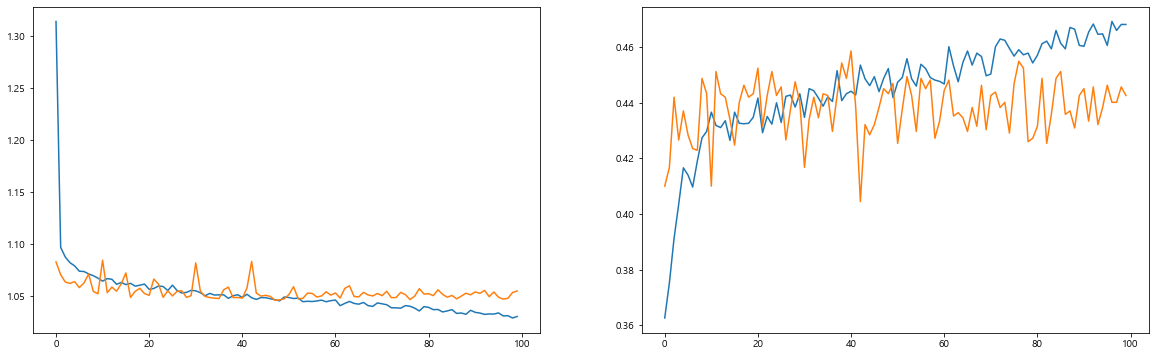

In [1844]:
fig , axes = plt.subplots(1,2, figsize = (20,6))
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[1].plot(history.history['acc'])
axes[1].plot(history.history['val_acc'])

## 피쳐 엔지니어링

### 피쳐 중요도

[('가구월평균소득', 0.09060648635002723),
 ('경제적_만족도', 0.04968638561874616),
 ('건강상태_만족도', 0.04697658721450763),
 ('여가문화생활_만족도', 0.040995898675699374),
 ('전반적인삶_만족도', 0.04008549204420052),
 ('pc_노트북_보유', 0.02927695282969849),
 ('가구거주형태_2', 0.027548820639921333),
 ('성별', 0.025822874566024227),
 ('가구거주형태_1', 0.025166615128954725),
 ('앱 검색 및 설치', 0.025121327869170276),
 ('최종학력_2', 0.02423139673200624),
 ('직업_11', 0.02416768881380493),
 ('광역시도_9', 0.023430350047349346),
 ('동거자녀_존재', 0.023038406038257533),
 ('최종학력_3', 0.02265600600810034),
 ('미디어콘텐츠', 0.022547492797602778),
 ('뉴스_날씨', 0.022444964910176703),
 ('광역시도_1', 0.02198123906180355),
 ('SNS', 0.021671555887732608),
 ('직업_14', 0.021223680327432725),
 ('배우자_존재', 0.020112025515563032),
 ('동_1_읍면_0', 0.019994754001009613),
 ('가구거주형태_3', 0.01776091368026737),
 ('직업_5', 0.01688759443792869),
 ('스마트폰_태블릿PC_보유', 0.016606870225430125),
 ('연령', 0.016466588052129232),
 ('최종학력_1', 0.015884745773350334),
 ('직업_4', 0.01518354535031858),
 ('광역시도_2', 0.014

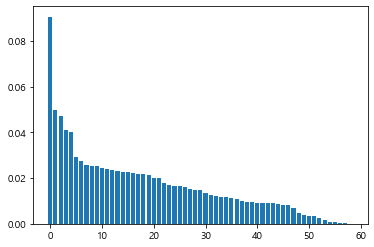

In [1659]:
plt.rcParams['font.family'] = "Malgun Gothic"

# 랜덤포레스트 피쳐 중요도 
# 학습한 모델의 피쳐 중요도 그래프로 살펴봅니다
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices])

#학습한 모델의 피쳐 중요도 출력합니다
feat_labels =X.columns.tolist()
feature = list(zip(feat_labels, forest.feature_importances_))
#forest.feature_importances_로 순서를 맞춰 보여줘라
sorted(feature, key = lambda tup: tup[1], reverse = True)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

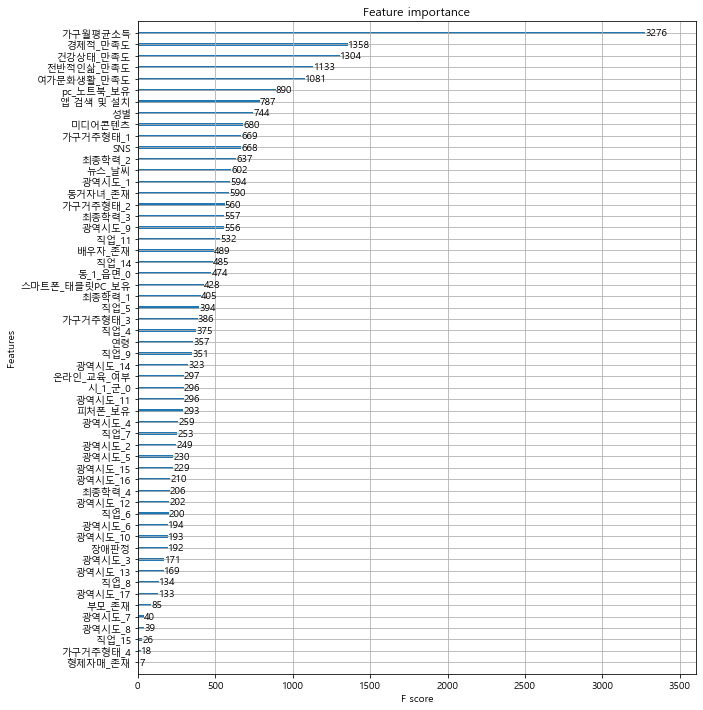

In [1660]:
#XG부스트 피쳐 중요도
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb, ax=ax)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

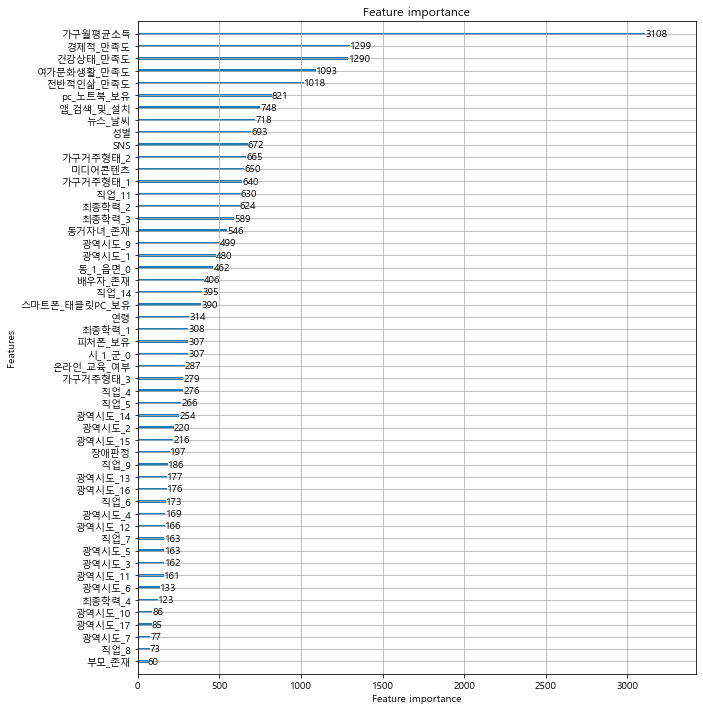

In [1661]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)


### 피쳐 한개당 중요도 (넣다 뺏다)

In [1524]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(forest, random_state =1).fit(X_test,y_test)
eli5.show_weights(perm,feature_names = X_test.columns.tolist())

Weight,Feature
0.0118 ± 0.0104,pc_노트북_보유
0.0115 ± 0.0164,전반적인삶_만족도
0.0085 ± 0.0176,직업_11
0.0067 ± 0.0127,뉴스_날씨
0.0063 ± 0.0129,SNS
0.0059 ± 0.0154,미디어콘텐츠
0.0059 ± 0.0054,광역시도_9
0.0052 ± 0.0059,최종학력_2
0.0048 ± 0.0138,건강상태_만족도
0.0041 ± 0.0095,동거자녀_존재


In [1525]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(xgb, random_state =1).fit(X_test,y_test)
eli5.show_weights(perm,feature_names = X_test.columns.tolist())

Weight,Feature
0.0244 ± 0.0238,가구월평균소득
0.0200 ± 0.0147,pc_노트북_보유
0.0181 ± 0.0072,광역시도_9
0.0174 ± 0.0145,뉴스_날씨
0.0170 ± 0.0133,전반적인삶_만족도
0.0137 ± 0.0121,동_1_읍면_0
0.0118 ± 0.0069,여가문화생활_만족도
0.0104 ± 0.0133,최종학력_3
0.0092 ± 0.0062,SNS
0.0092 ± 0.0126,가구거주형태_1


In [1526]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(lgbm_wrapper, random_state =1).fit(X_test,y_test)
eli5.show_weights(perm,feature_names = X_test.columns.tolist())

Weight,Feature
0.0285 ± 0.0104,전반적인삶_만족도
0.0196 ± 0.0141,미디어콘텐츠
0.0166 ± 0.0112,스마트폰_태블릿PC_보유
0.0159 ± 0.0231,가구월평균소득
0.0122 ± 0.0060,pc_노트북_보유
0.0104 ± 0.0136,직업_11
0.0100 ± 0.0215,뉴스_날씨
0.0070 ± 0.0049,광역시도_17
0.0063 ± 0.0083,광역시도_2
0.0055 ± 0.0062,광역시도_5


### 연관성 분석

In [1527]:
from scipy.stats import chi2_contingency

lst = []
for i in range(0,60):
    a = pd.crosstab(df_65_old_range.iloc[:,i], df_65_old_range.y)
    chiresult = chi2_contingency(a, correction = False)
    lst.append([df_65_old_range.columns[i],chiresult[1]])
    
교차검정 = pd.DataFrame(lst)

In [1528]:
교차검정.iloc[교차검정[1].sort_values().index,:]

,0,1
59,y,0.000000e+00
51,뉴스_날씨,1.213267e-10
52,미디어콘텐츠,1.029334e-09
50,스마트폰_태블릿PC_보유,1.422751e-09
47,온라인_교육_여부,9.612064e-09
49,피처폰_보유,7.947788e-06
26,광역시도_13,8.555110e-06
53,SNS,2.090287e-05
9,전반적인삶_만족도,4.983431e-05
5,가구월평균소득,6.100480e-05


In [1529]:
columns = []
for i in 교차검정[교차검정[1]<=0.05][0]:
    columns.append(i)
columns  

['연령',
 '동_1_읍면_0',
 '가구월평균소득',
 '여가문화생활_만족도',
 '경제적_만족도',
 '건강상태_만족도',
 '전반적인삶_만족도',
 '직업_3',
 '직업_6',
 '직업_8',
 '광역시도_10',
 '광역시도_13',
 '광역시도_16',
 '광역시도_17',
 '광역시도_4',
 '최종학력_1',
 '온라인_교육_여부',
 'pc_노트북_보유',
 '피처폰_보유',
 '스마트폰_태블릿PC_보유',
 '뉴스_날씨',
 '미디어콘텐츠',
 'SNS',
 '앱 검색 및 설치',
 '배우자_존재',
 '동거자녀_존재',
 'y']

## 피쳐 엔지니어링

In [622]:
# 중요도 : ['연령','가구월평균소득','전반적인삶_만족도','경제적_만족도','건강상태_만족도','여가문화생활만족도'] ['성별','pc_노트북_보유','가구거주형태_2','앱_검색_및_설치','SNS','미디어콘텐츠','뉴스_날씨','가구거주형태_1','최종학력_3','미디어콘텐츠','뉴스_날씨','가구거주형태','최종학력_2']
# eli5 :

In [1667]:
#df_65 (연령 : 연속형, 65세 이상)
columns =['연령',
 '동_1_읍면_0',
 '가구월평균소득',
 '여가문화생활_만족도',
 '경제적_만족도',
 '건강상태_만족도',
 '전반적인삶_만족도']
X = df_65_old_range[columns]
y = df_65_old_range['y']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2161, 7) (541, 7) (2161,) (541,)


In [1663]:
#랜덤 포레스트 모델
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(n_estimators = 100 ,max_depth = 18, random_state = 42 ) # 시드값 고정
model1 = forest.fit(X_train, y_train) # 학습 진행

predict_train = model1.predict(X_train) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_train, predict_train) * 100), "%")

predict_test = model1.predict(X_test) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_test, predict_test) * 100), "%")



Accuracy: 62.15 %
Accuracy: 43.81 %


In [1664]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

#비선형 SVM 분류모델을 학습하고 평가
svm = SVC(kernel = 'rbf', C=1.0, random_state = 0, gamma = 0.1)
svm.fit(X_train, y_train)
y_pred_ksvc = svm.predict(X_test)
print('Accuracy %.2f' % accuracy_score(y_test, y_pred_ksvc))

#Confusion Matrix
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred_ksvc)
print(confmat)

Accuracy 0.43
[[141  71   0]
 [110  90   0]
 [ 79  50   0]]


In [828]:
df_65['y'].value_counts()

2    652
1    625
3    221
4    109
5     33
Name: y, dtype: int64